In [657]:
import pandas as pd

df = pd.read_csv('cleaned_data_50_prods_NEW.csv')
df

,item_id,dept_id,cat_id,day,month,year,weekday,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price,units_sold,units_sold_monthly_mean,overall_units_sold_monthly_mean
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,13,7,2013,Saturday,11325,None,None,None,None,0,9.58,0,0.052632,11.666667
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,14,7,2013,Sunday,11325,None,None,None,None,0,9.58,0,0.052632,11.666667
2,HOBBIES_1_001,HOBBIES_1,HOBBIES,15,7,2013,Monday,11325,None,None,None,None,0,9.58,0,0.052632,11.666667
3,HOBBIES_1_001,HOBBIES_1,HOBBIES,16,7,2013,Tuesday,11325,None,None,None,None,0,9.58,0,0.052632,11.666667
4,HOBBIES_1_001,HOBBIES_1,HOBBIES,17,7,2013,Wednesday,11325,None,None,None,None,0,9.58,0,0.052632,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82065,HOBBIES_1_050,HOBBIES_1,HOBBIES,27,12,2015,Sunday,11548,None,None,None,None,0,10.98,0,1.806452,33.600000
82066,HOBBIES_1_050,HOBBIES_1,HOBBIES,28,12,2015,Monday,11548,None,None,None,None,0,10.98,2,1.806452,33.600000
82067,HOBBIES_1_050,HOBBIES_1,HOBBIES,29,12,2015,Tuesday,11548,None,None,None,None,0,10.98,0,1.806452,33.600000
82068,HOBBIES_1_050,HOBBIES_1,HOBBIES,30,12,2015,Wednesday,11548,None,None,None,None,0,10.98,0,1.806452,33.600000


In [658]:
# Create train/test split

df2 = df.copy()

train = df2[df2['year'] < 2015]
train_df = train.copy()
y_train = train_df.pop('units_sold')
X_train = train_df.copy()

test = df2[df2['year'] >= 2015]
test_df = test.copy()
y_test = test_df.pop('units_sold')
X_test = test_df.copy()

train_df.shape[0] / df.shape[0]

0.6905081028390399

In [336]:
#  CATBOOST

In [337]:
# Define categorical features

cat_columns = df.columns.tolist()[:-4]
print("Names of categorical columns : ", cat_columns)

cat_idx = [df.columns.get_loc(col) for col in cat_columns]
print("Indices of categorical columns : ",cat_idx)

Names of categorical columns :  ['item_id', 'dept_id', 'cat_id', 'day', 'month', 'year', 'weekday', 'wm_yr_wk', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA']
Indices of categorical columns :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [338]:
# Import the Pool class from catboost and use it for train/test split

from catboost import Pool


train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_idx
                 )

test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_idx
                 )

In [348]:
# Creat catboost model and train it

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(random_seed=2022, iterations=400, depth=12, l2_leaf_reg=5)

model.fit(train_data, eval_set=(X_test, y_test))

# depth=8, learning_rate=0.0025, iterations=2000,

# parameters = {'depth' : [6,8,10],
#               'learning_rate' : [0.01, 0.05, 0.1],
#               'iterations'    : [30, 50, 100]
#               }

# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)

0:	learn: 3.9739240	test: 3.9476210	best: 3.9476210 (0)	total: 435ms	remaining: 2m 53s
1:	learn: 3.9366484	test: 3.9076965	best: 3.9076965 (1)	total: 570ms	remaining: 1m 53s
2:	learn: 3.9000785	test: 3.8656183	best: 3.8656183 (2)	total: 701ms	remaining: 1m 32s
3:	learn: 3.8650607	test: 3.8265036	best: 3.8265036 (3)	total: 923ms	remaining: 1m 31s
4:	learn: 3.8332302	test: 3.8265036	best: 3.8265036 (3)	total: 1.03s	remaining: 1m 21s
5:	learn: 3.8017432	test: 3.7902946	best: 3.7902946 (5)	total: 1.25s	remaining: 1m 22s
6:	learn: 3.7732350	test: 3.7567833	best: 3.7567833 (6)	total: 1.31s	remaining: 1m 13s
7:	learn: 3.7450395	test: 3.7250941	best: 3.7250941 (7)	total: 1.39s	remaining: 1m 8s
8:	learn: 3.7184963	test: 3.6946196	best: 3.6946196 (8)	total: 1.56s	remaining: 1m 7s
9:	learn: 3.6929441	test: 3.6638059	best: 3.6638059 (9)	total: 1.68s	remaining: 1m 5s
10:	learn: 3.6680320	test: 3.6493087	best: 3.6493087 (10)	total: 1.87s	remaining: 1m 6s
11:	learn: 3.6454553	test: 3.6230105	best: 3.

94:	learn: 3.1436915	test: 3.1277271	best: 3.1277271 (94)	total: 32.5s	remaining: 1m 44s
95:	learn: 3.1404987	test: 3.1264525	best: 3.1264525 (95)	total: 33.1s	remaining: 1m 44s
96:	learn: 3.1366663	test: 3.1257877	best: 3.1257877 (96)	total: 33.6s	remaining: 1m 44s
97:	learn: 3.1351989	test: 3.1263338	best: 3.1257877 (96)	total: 34.1s	remaining: 1m 45s
98:	learn: 3.1329927	test: 3.1253301	best: 3.1253301 (98)	total: 34.6s	remaining: 1m 45s
99:	learn: 3.1321526	test: 3.1215669	best: 3.1215669 (99)	total: 35.1s	remaining: 1m 45s
100:	learn: 3.1297811	test: 3.1215718	best: 3.1215669 (99)	total: 35.6s	remaining: 1m 45s
101:	learn: 3.1295853	test: 3.1207631	best: 3.1207631 (101)	total: 35.6s	remaining: 1m 44s
102:	learn: 3.1281835	test: 3.1210218	best: 3.1207631 (101)	total: 36.1s	remaining: 1m 44s
103:	learn: 3.1279751	test: 3.1203006	best: 3.1203006 (103)	total: 36.2s	remaining: 1m 43s
104:	learn: 3.1269495	test: 3.1186520	best: 3.1186520 (104)	total: 36.7s	remaining: 1m 43s
105:	learn: 

185:	learn: 3.0449950	test: 3.0858936	best: 3.0855587 (178)	total: 1m 13s	remaining: 1m 24s
186:	learn: 3.0440742	test: 3.0858358	best: 3.0855587 (178)	total: 1m 14s	remaining: 1m 24s
187:	learn: 3.0440298	test: 3.0856081	best: 3.0855587 (178)	total: 1m 14s	remaining: 1m 23s
188:	learn: 3.0435388	test: 3.0840518	best: 3.0840518 (188)	total: 1m 14s	remaining: 1m 23s
189:	learn: 3.0428374	test: 3.0841419	best: 3.0840518 (188)	total: 1m 15s	remaining: 1m 23s
190:	learn: 3.0419165	test: 3.0841285	best: 3.0840518 (188)	total: 1m 15s	remaining: 1m 23s
191:	learn: 3.0397719	test: 3.0847753	best: 3.0840518 (188)	total: 1m 16s	remaining: 1m 22s
192:	learn: 3.0379401	test: 3.0849371	best: 3.0840518 (188)	total: 1m 17s	remaining: 1m 22s
193:	learn: 3.0375376	test: 3.0847774	best: 3.0840518 (188)	total: 1m 17s	remaining: 1m 22s
194:	learn: 3.0368208	test: 3.0843620	best: 3.0840518 (188)	total: 1m 18s	remaining: 1m 22s
195:	learn: 3.0358314	test: 3.0844385	best: 3.0840518 (188)	total: 1m 18s	remain

275:	learn: 2.9771111	test: 3.0793904	best: 3.0787118 (273)	total: 1m 52s	remaining: 50.5s
276:	learn: 2.9768641	test: 3.0777401	best: 3.0777401 (276)	total: 1m 52s	remaining: 50.2s
277:	learn: 2.9766907	test: 3.0758578	best: 3.0758578 (277)	total: 1m 53s	remaining: 49.6s
278:	learn: 2.9766893	test: 3.0758557	best: 3.0758557 (278)	total: 1m 53s	remaining: 49.1s
279:	learn: 2.9759818	test: 3.0762981	best: 3.0758557 (278)	total: 1m 53s	remaining: 48.7s
280:	learn: 2.9759738	test: 3.0762620	best: 3.0758557 (278)	total: 1m 53s	remaining: 48.2s
281:	learn: 2.9738943	test: 3.0764050	best: 3.0758557 (278)	total: 1m 54s	remaining: 47.8s
282:	learn: 2.9715711	test: 3.0760398	best: 3.0758557 (278)	total: 1m 54s	remaining: 47.4s
283:	learn: 2.9714027	test: 3.0763121	best: 3.0758557 (278)	total: 1m 55s	remaining: 47s
284:	learn: 2.9714027	test: 3.0763107	best: 3.0758557 (278)	total: 1m 55s	remaining: 46.4s
285:	learn: 2.9711318	test: 3.0756189	best: 3.0756189 (285)	total: 1m 55s	remaining: 46.1s
2

366:	learn: 2.9055741	test: 3.0607673	best: 3.0605243 (365)	total: 2m 33s	remaining: 13.8s
367:	learn: 2.9050747	test: 3.0609399	best: 3.0605243 (365)	total: 2m 33s	remaining: 13.4s
368:	learn: 2.9030638	test: 3.0608998	best: 3.0605243 (365)	total: 2m 34s	remaining: 13s
369:	learn: 2.9029959	test: 3.0563688	best: 3.0563688 (369)	total: 2m 34s	remaining: 12.5s
370:	learn: 2.9029790	test: 3.0563345	best: 3.0563345 (370)	total: 2m 34s	remaining: 12.1s
371:	learn: 2.9026361	test: 3.0573015	best: 3.0563345 (370)	total: 2m 35s	remaining: 11.7s
372:	learn: 2.9024758	test: 3.0573015	best: 3.0563345 (370)	total: 2m 35s	remaining: 11.3s
373:	learn: 2.9019312	test: 3.0576400	best: 3.0563345 (370)	total: 2m 36s	remaining: 10.9s
374:	learn: 2.9003235	test: 3.0571999	best: 3.0563345 (370)	total: 2m 36s	remaining: 10.5s
375:	learn: 2.8980529	test: 3.0572850	best: 3.0563345 (370)	total: 2m 37s	remaining: 10.1s
376:	learn: 2.8970004	test: 3.0573893	best: 3.0563345 (370)	total: 2m 38s	remaining: 9.64s
3

In [ ]:
# best: 3.0559877

In [633]:
# Generate predictions total units sold for each day

y_pred = model.predict(X_test)

a = test.copy()
a['units_sold'] = y_pred
a = a.groupby(['day','month','year'])['units_sold'].sum().reset_index()

rows = a.shape[0]
dates = []

for i in range(rows):
    x = a.iloc[i]['day']
    y = a.iloc[i]['month']
    z = a.iloc[i]['year']
    out = str(z)[0:-2]+'-'+str(y)[0:-2]+'-'+str(x)[0:-2]
    dates.append(out)

a['date'] = dates
a['date'] = pd.to_datetime(a['date'])
a = a.sort_values(by=['date'])

a

,day,month,year,units_sold,date
0,1,1,2015,55.333698,2015-01-01
17,2,1,2015,71.141422,2015-01-02
34,3,1,2015,73.547517,2015-01-03
51,4,1,2015,71.557926,2015-01-04
68,5,1,2015,61.186704,2015-01-05
...,...,...,...,...,...
298,18,5,2016,67.785235,2016-05-18
315,19,5,2016,69.788483,2016-05-19
332,20,5,2016,73.809619,2016-05-20
349,21,5,2016,78.375221,2016-05-21


In [634]:
# Get actual total units sold for each day

b = test.copy()
b = b.groupby(['day','month','year'])['units_sold'].sum().reset_index()

rows = b.shape[0]
dates = []

for i in range(rows):
    x = b.iloc[i]['day']
    y = b.iloc[i]['month']
    z = b.iloc[i]['year']
    out = str(z)[0:-2]+'-'+str(y)[0:-2]+'-'+str(x)[0:-2]
    dates.append(out)

b['date'] = dates
b['date'] = pd.to_datetime(a['date'])
b = b.sort_values(by=['date'])

b

,day,month,year,units_sold,date
0,1,1,2015,44,2015-01-01
17,2,1,2015,51,2015-01-02
34,3,1,2015,39,2015-01-03
51,4,1,2015,79,2015-01-04
68,5,1,2015,87,2015-01-05
...,...,...,...,...,...
298,18,5,2016,64,2016-05-18
315,19,5,2016,47,2016-05-19
332,20,5,2016,83,2016-05-20
349,21,5,2016,138,2016-05-21


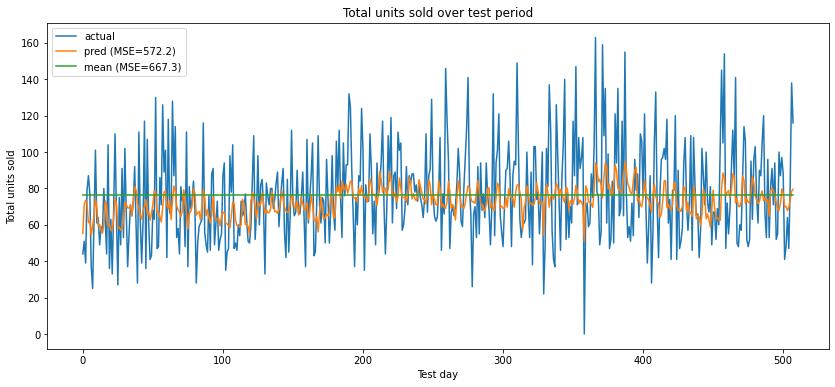

In [651]:
y_actual = b.units_sold.values

y_pred = a.units_sold.values
y_pred_MSE = round(mean_squared_error(y_actual,y_pred),1)

y_avg = np.mean(b.units_sold.values) * np.ones(len(b.units_sold.values))
y_avg_MSE = round(mean_squared_error(y_actual,y_avg),1)

figure(figsize=(14, 6))

plt.title('Total units sold over test period')
plt.xlabel('Test day')
plt.ylabel('Total units sold')

plt.plot(y_actual, label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_avg,label='mean (MSE='+str(y_avg_MSE)+')')

plt.legend()

In [659]:
# Generate model test predictions on particular product

item_id = 'HOBBIES_1_009'

a = X_test.copy()

x_pred = a[a['item_id'] == item_id]
y_pred = model.predict(x_pred)
# y_pred = np.round(y_pred)

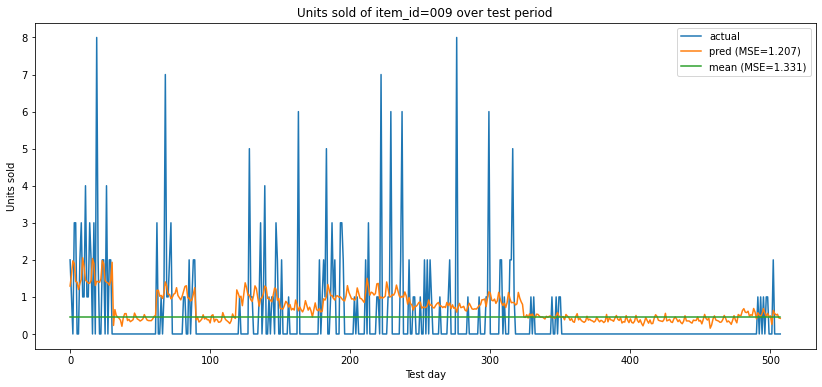

In [662]:
# Plot model test predictions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

actual_df = df[df['year'] >= 2015]
actual_df = actual_df[actual_df['item_id'] == item_id]
y_actual = actual_df.pop('units_sold').to_numpy()

y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)

y_avg = np.mean(y_actual) * np.ones(len(y_actual))
y_avg_MSE = round(mean_squared_error(y_actual,y_avg),3)

figure(figsize=(14, 6))

plt.title('Units sold of item_id=009 over test period')
plt.xlabel('Test day')
plt.ylabel('Units sold')

plt.plot(y_actual, label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_avg,label='mean (MSE='+str(y_avg_MSE)+')')

plt.legend()

In [563]:
# Calculate MSE on model test predictions

from sklearn.metrics import mean_squared_error

mean_squared_error(y_actual,y_pred), mean_squared_error(y_actual,y_avg)

(1.2072377838138315, 1.3311271622543244)

In [ ]:
################################################################################################################################

In [ ]:
# path = 'cleaned_data_50_prods_NEW.csv'

# df = pd.read_csv('cleaned_data_50_prods_NEW.csv')

# df

In [ ]:
# from fastai.tabular.all import *

# cat_columns = df.columns.tolist()[:-1]

# dls = TabularDataLoaders.from_csv(path,y_names='units_sold',cat_names=cat_columns,procs=[Categorify,FillMissing,Normalize])

# dls.show_batch()

In [ ]:
# learn = tabular_learner(dls,metrics=accuracy)
# learn.fit_one_cycle(5)

In [ ]:
################################################################################################################################

In [ ]:
# MLPRegressor

In [663]:
# Relabel data

df2 = df.copy()

cols = df.columns.tolist()
cols = cols[0:3] + cols[6:13]

for col in cols:

    unique = df2[col].unique()

    int_to_unique = {i:unique for i,unique in enumerate(unique)}
    unique_to_int = {unique:i for i,unique in enumerate(unique)}

    df2[col] = df2[col].apply( lambda x: unique_to_int[x] )

df2

,item_id,dept_id,cat_id,day,month,year,weekday,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price,units_sold,units_sold_monthly_mean,overall_units_sold_monthly_mean
0,0,0,0,13,7,2013,0,0,0,0,0,0,0,9.58,0,0.052632,11.666667
1,0,0,0,14,7,2013,1,0,0,0,0,0,0,9.58,0,0.052632,11.666667
2,0,0,0,15,7,2013,2,0,0,0,0,0,0,9.58,0,0.052632,11.666667
3,0,0,0,16,7,2013,3,0,0,0,0,0,0,9.58,0,0.052632,11.666667
4,0,0,0,17,7,2013,4,0,0,0,0,0,0,9.58,0,0.052632,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82065,49,0,0,27,12,2015,1,78,0,0,0,0,0,10.98,0,1.806452,33.600000
82066,49,0,0,28,12,2015,2,78,0,0,0,0,0,10.98,2,1.806452,33.600000
82067,49,0,0,29,12,2015,3,78,0,0,0,0,0,10.98,0,1.806452,33.600000
82068,49,0,0,30,12,2015,4,78,0,0,0,0,0,10.98,0,1.806452,33.600000


In [664]:
# Create train/test split

df3 = df2.copy()

train = df3[df3['year'] < 2015]
train_df = train.copy()
y_train = train_df.pop('units_sold')
X_train = train_df.copy()

test = df3[df3['year'] >= 2015]
test_df = test.copy()
y_test = test_df.pop('units_sold')
X_test = test_df.copy()

train_df.shape[0] / df.shape[0]

0.6905081028390399

In [611]:
# Train MLPRegressor

from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(25,), random_state=2022, learning_rate='adaptive', verbose=True)
regr.fit(X_train, y_train)

Iteration 1, loss = 319.87571290
Iteration 2, loss = 7.91460038
Iteration 3, loss = 5.70056051
Iteration 4, loss = 5.53513199
Iteration 5, loss = 5.44138719
Iteration 6, loss = 5.40207539
Iteration 7, loss = 5.35538896
Iteration 8, loss = 5.32788950
Iteration 9, loss = 5.32904137
Iteration 10, loss = 5.31004291
Iteration 11, loss = 5.30878698
Iteration 12, loss = 5.31350228
Iteration 13, loss = 5.38183020
Iteration 14, loss = 5.39247259
Iteration 15, loss = 5.34908971
Iteration 16, loss = 5.37298635
Iteration 17, loss = 5.32456017
Iteration 18, loss = 5.36426695
Iteration 19, loss = 5.33946108
Iteration 20, loss = 5.39769839
Iteration 21, loss = 5.41850341
Iteration 22, loss = 5.39155926
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(25,), learning_rate='adaptive',
             random_state=2022, verbose=True)

In [654]:
# Generate predictions total units sold for each day

y_pred = regr.predict(X_test)

a = test.copy()
a['units_sold'] = y_pred
a = a.groupby(['day','month','year'])['units_sold'].sum().reset_index()

rows = a.shape[0]
dates = []

for i in range(rows):
    x = a.iloc[i]['day']
    y = a.iloc[i]['month']
    z = a.iloc[i]['year']
    out = str(z)[0:-2]+'-'+str(y)[0:-2]+'-'+str(x)[0:-2]
    dates.append(out)

a['date'] = dates
a['date'] = pd.to_datetime(a['date'])
a = a.sort_values(by=['date'])

a

,day,month,year,units_sold,date
0,1,1,2015,46.544955,2015-01-01
17,2,1,2015,49.369094,2015-01-02
34,3,1,2015,69.073256,2015-01-03
51,4,1,2015,65.533809,2015-01-04
68,5,1,2015,61.994361,2015-01-05
...,...,...,...,...,...
298,18,5,2016,68.811346,2016-05-18
315,19,5,2016,65.271899,2016-05-19
332,20,5,2016,61.732451,2016-05-20
349,21,5,2016,81.333654,2016-05-21


In [655]:
# Get actual total units sold for each day

b = test.copy()
b = b.groupby(['day','month','year'])['units_sold'].sum().reset_index()

rows = b.shape[0]
dates = []

for i in range(rows):
    x = b.iloc[i]['day']
    y = b.iloc[i]['month']
    z = b.iloc[i]['year']
    out = str(z)[0:-2]+'-'+str(y)[0:-2]+'-'+str(x)[0:-2]
    dates.append(out)

b['date'] = dates
b['date'] = pd.to_datetime(a['date'])
b = b.sort_values(by=['date'])

b

,day,month,year,units_sold,date
0,1,1,2015,44,2015-01-01
17,2,1,2015,51,2015-01-02
34,3,1,2015,39,2015-01-03
51,4,1,2015,79,2015-01-04
68,5,1,2015,87,2015-01-05
...,...,...,...,...,...
298,18,5,2016,64,2016-05-18
315,19,5,2016,47,2016-05-19
332,20,5,2016,83,2016-05-20
349,21,5,2016,138,2016-05-21


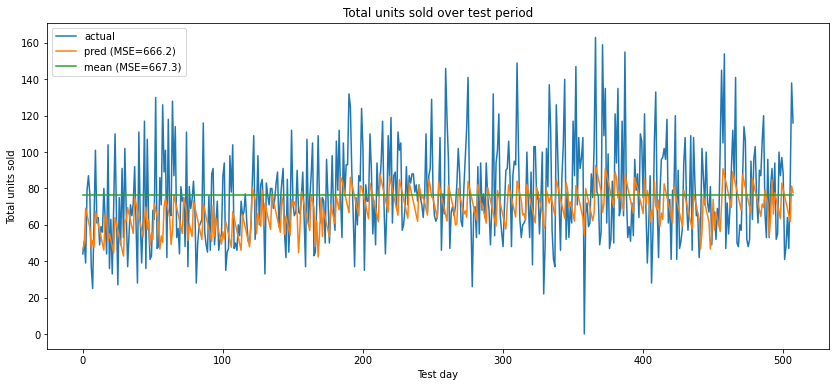

In [656]:
y_actual = b.units_sold.values

y_pred = a.units_sold.values
y_pred_MSE = round(mean_squared_error(y_actual,y_pred),1)

y_avg = np.mean(b.units_sold.values) * np.ones(len(b.units_sold.values))
y_avg_MSE = round(mean_squared_error(y_actual,y_avg),1)

figure(figsize=(14, 6))

plt.title('Total units sold over test period')
plt.xlabel('Test day')
plt.ylabel('Total units sold')

plt.plot(y_actual, label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_avg,label='mean (MSE='+str(y_avg_MSE)+')')

plt.legend()

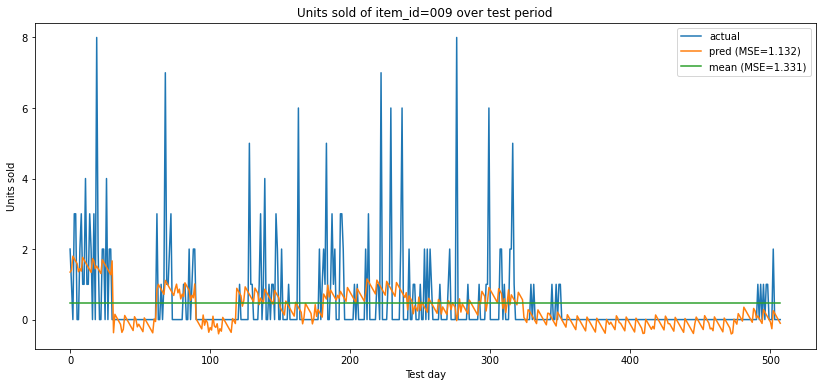

In [665]:
# Generate/plot model test predictions on particular product

item_id = 8

a = X_test.copy()

x_pred = a[a['item_id'] == item_id]
y_pred = regr.predict(x_pred)
# y_pred = np.round(y_pred)

actual_df = df2[df2['year'] >= 2015]
actual_df = actual_df[actual_df['item_id'] == item_id]
y_actual = actual_df.pop('units_sold').to_numpy()

y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)

# for i in range(len(y_pred)):
#     if y_pred[i]<0:
#         y_pred[i]=0

y_avg = np.mean(y_actual) * np.ones(len(y_actual))
y_avg_MSE = round(mean_squared_error(y_actual,y_avg),3)

figure(figsize=(14, 6))

plt.title('Units sold of item_id=009 over test period')
plt.xlabel('Test day')
plt.ylabel('Units sold')

plt.plot(y_actual, label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_avg,label='mean (MSE='+str(y_avg_MSE)+')')

plt.legend()

In [ ]:
################################################################################################################################

In [667]:
from autosklearn.regression import AutoSklearnRegressor

auto_regr = AutoSklearnRegressor()

auto_regr.fit(X_train, y_train)

ModuleNotFoundError: No module named 'autosklearn'